# Credit Risk & Loan Performance: 

#### Author: Satveer Kaur
#### Date: 2025-10-22
#### Notebook Purpose:
This notebook focuses on **bivariate exploratory data analysis (EDA)** for the LendingClub Accepted and Rejected Loans datasets. The goal is to:
1. Explore relationships between key variables (numerical vs numerical, numerical vs categorical, categorical vs categorical).
2. Identify correlations, patterns, and trends that influence loan performance and credit risk.
3. Visualize interactions to inform feature selection and potential predictive modeling.

#### 1. Load Sample Datasets
**Purpose**: Load the previously created sample datasets for efficient and consistent analysis.

In [70]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load sample datasets
accepted_sample = pd.read_csv('../data/sample_data/accepted_sample_processed.csv', low_memory=False)
rejected_sample = pd.read_csv('../data/sample_data/rejected_sample_processed.csv')

In [71]:
# Setting style/palette for all plots
plt.style.use('ggplot')
sns.set_palette("Set2")

#### 2.  Bivariate Analysis

##### 2.1  Loan Amount by Loan Status
**Purpose**: This analysis examines how loan amounts vary across different loan status categories (e.g., Fully Paid, Charged Off, Current). By comparing the average loan amounts by status, we can identify whether larger loan sizes are associated with higher default rates or successful repayments. This insight helps evaluate potential credit risk patterns related to loan size.

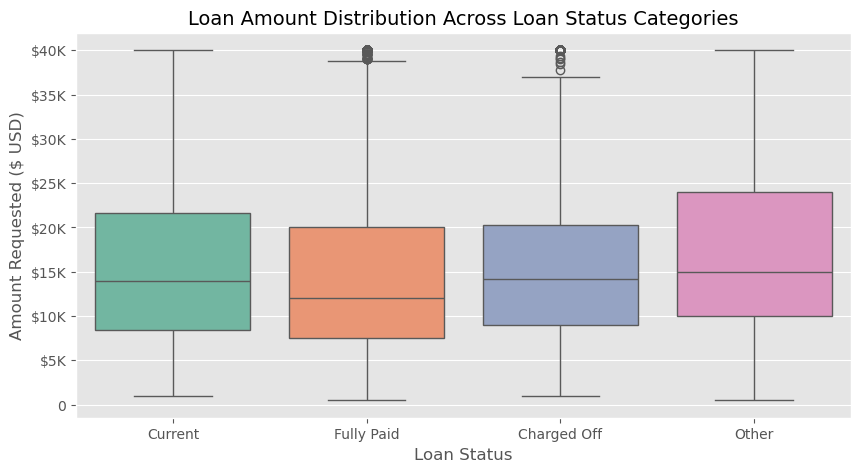

In [55]:
plt.figure(figsize=(10,5))
sns.boxplot(
    data=accepted_sample,
    x='loan_status_grouped',
    y='amount_requested',
    palette='Set2',
    hue='loan_status_grouped'
)
plt.title('Loan Amount Distribution Across Loan Status Categories', fontsize=14)
ax= plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'${int(y/1000)}K' if y!=0 else '0'))
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Amount Requested ($ USD)', fontsize=12)
plt.xticks(rotation=0)
plt.show()


>**Interpretation:** Loans that are **Fully Paid** tend to have **lower median** amounts, while **Current and Charged Off loans** show **higher medians**. This suggests that larger loan amounts may carry a higher repayment risk, whereas smaller loans are more likely to be repaid in full.

##### 2.2  Loan Term vs Loan Status
**Purpose:** This analysis examines how loan term length (36 vs 60 months) relates to loan repayment outcomes, helping to identify whether longer loan durations are associated with higher risk or different repayment behaviors.

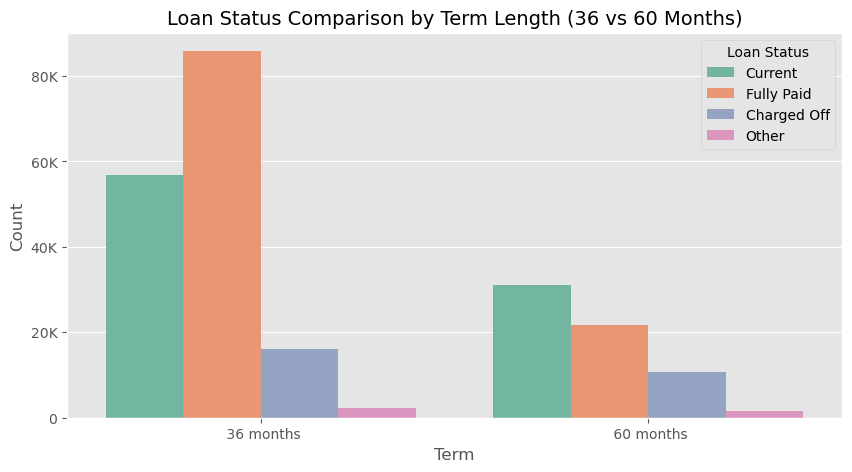

In [56]:
# --- Categorical: Term vs Loan Status ---
plt.figure(figsize=(10,5))
sns.countplot(data=accepted_sample, x='term', hue='loan_status_grouped',palette='Set2')
plt.title('Loan Status Comparison by Term Length (36 vs 60 Months)', fontsize=14)
ax= plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'{int(y/1000)}K' if y!=0 else '0'))
plt.xlabel('Term')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

> **Interpretation:** The majority of loans across all categories have a **36-month term**, reflecting *borrower preference and lender comfort* with shorter repayment periods.
However, **60-month loans** exhibit a **higher proportion of Charged Off and Current statuses** compared to Fully Paid, suggesting that **longer-term loans may be more prone to default or take longer to reach full repayment.**
This finding indicates that **loan term duration is a significant factor in credit risk assessment**, as extended terms can influence both **repayment reliability and portfolio performance.**

##### 2.3  Loan Grade vs Loan Status
**Purpose:** This analysis examines how loan repayment outcomes differ across credit grades, providing insight into the relationship between borrower credit quality and loan performance. It helps identify which credit grades are associated with higher risks of default or late payments and supports data-driven lending decisions.

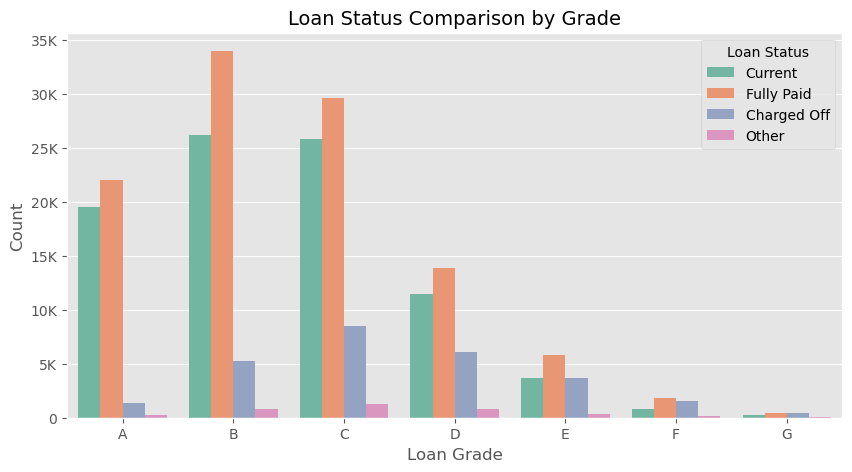

In [57]:
# Keep only string values and ignore NaN or float
grade_order = sorted([g for g in accepted_sample['grade'].dropna() if isinstance(g, str)])
plt.figure(figsize=(10,5))
sns.countplot(
    data=accepted_sample, 
    x='grade', 
    hue='loan_status_grouped',
    palette='Set2',
    order=grade_order
    )
ax= plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'{int(y/1000)}K' if y!=0 else '0'))
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.title('Loan Status Comparison by Grade', fontsize=14)
plt.legend(title='Loan Status')
plt.show()

>**Interpretation:**  Higher-grade loans (A–C) are predominantly fully paid or current, while lower-grade loans (D–G) show a higher proportion of defaults, highlighting the strong link between credit grade and repayment risk.

##### 2.4  Interest Rate vs Loan Status
**Purpose:** To examine the relationship between loan interest rates and loan outcomes, highlighting how higher interest rates may correspond to increased risk of default or delayed repayment. This helps stakeholders understand the impact of interest pricing on borrower behavior and credit risk.

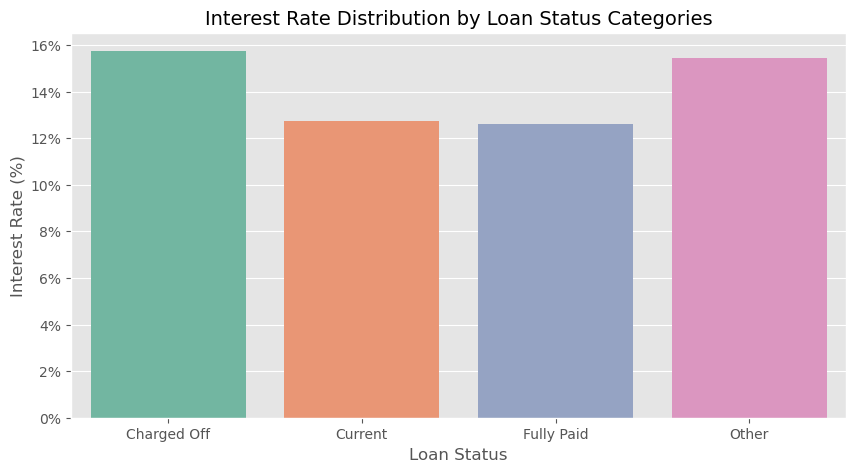

In [76]:
interest_rate_avg= accepted_sample.groupby('loan_status_grouped')['interest_rate'].mean()
plt.figure(figsize=(10,5))
sns.barplot(
    x=interest_rate_avg.index,
    y=interest_rate_avg.values,
    palette='Set2',
    hue=interest_rate_avg.index
)
plt.title('Interest Rate Distribution by Loan Status Categories', fontsize=14)
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'{int(y)}%'))
plt.xlabel('Loan Status',fontsize=12)
plt.ylabel('Interest Rate (%)', fontsize=12)
plt.show()

>**Interpretation:** The chart shows that loans which were **Charged Off** and those categorized as **Other** have the **highest average interest rates**, around 15–16%. In contrast, **Fully Paid and Current loans** tend to have lower interest rates, around 12–13%. This suggests a clear relationship: **higher interest rates are associated with higher risk of default**, while lower rates are linked to successful repayment.

##### 2.5  Loan Status by Home Ownership
**Purpose:** To examine how borrowers’ home ownership status (Mortgage, Rent, or Own) relates to loan performance, helping assess whether housing stability influences repayment outcomes.

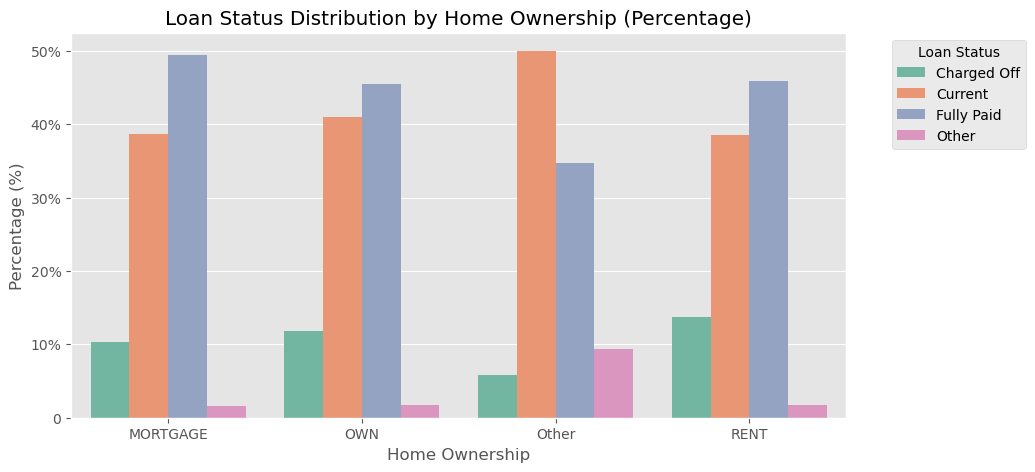

In [89]:
# Calculate percentages
home_status_counts = accepted_sample.groupby(['home_ownership_grouped', 'loan_status_grouped']).size().reset_index(name='count')
home_totals = home_status_counts.groupby('home_ownership_grouped')['count'].transform('sum')
home_status_counts['percent'] = (home_status_counts['count'] / home_totals) * 100

# Plot
plt.figure(figsize=(10,5))
sns.barplot(
    data=home_status_counts,
    x='home_ownership_grouped',
    y='percent',
    hue='loan_status_grouped',
    palette='Set2'
)

# Labels & title
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'{int(y)}%' if y!=0 else '0'))
plt.ylabel('Percentage (%)')
plt.xlabel('Home Ownership')
plt.title('Loan Status Distribution by Home Ownership (Percentage)')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Interpretation:** 
1. Among mortgage holders, nearly 49% of loans are fully paid, while 10% are charged off.
2. Borrowers who own their home outright (OWN) have a slightly lower charge-off rate (~12%) and a similar fully paid proportion (~45%).
3. Renters exhibit a higher proportion of charged-off loans (~14%), slightly more than mortgage holders, while fully paid loans are around 46%.
4. The Other home ownership category is very small, with highly variable percentages, so trends are less reliable.



> **Insight:** Home ownership type is correlated with loan performance: borrowers with mortgages or who own their homes tend to have lower default/charge-off rates than renters. This can guide risk assessment and lending decisions

##### 2.6 Default Rate by Income Bracket
**Purpose:** To understand how the likelihood of loan default varies across different borrower income levels, helping identify income segments with higher credit risk.

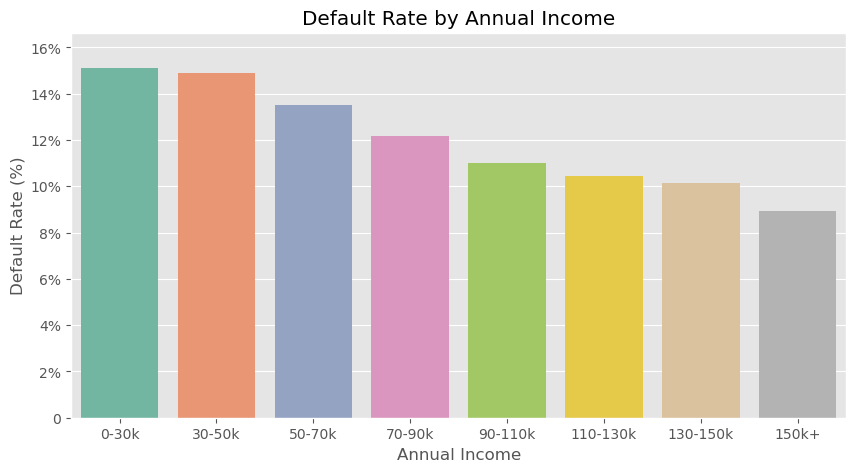

In [52]:
default_statuses = [
    'Charged Off',
    'Default',
    'Late (31-120 days)',
    'Does not meet the credit policy. Status:Charged Off'
]

# Column to check whether the loan defaulted or not ( 1= defaulted, 0=not defaulted)
accepted_sample['default_flag'] = accepted_sample['loan_status'].apply(lambda x: 1 if x in default_statuses else 0)

# Bin annual income
bins = [0, 30000, 50000, 70000, 90000, 110000, 130000, 150000, 200000]
labels = ['0-30k','30-50k','50-70k','70-90k','90-110k','110-130k','130-150k','150k+']
accepted_sample['income_bin'] = pd.cut(accepted_sample['annual_income'], bins=bins, labels=labels, include_lowest=True)

# Calculate default rate per income bin
default_rate_by_income = accepted_sample.groupby('income_bin', observed=False)['default_flag'].mean() * 100

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=default_rate_by_income.index, y=default_rate_by_income.values, hue=default_rate_by_income.index, palette="Set2")
plt.xticks(rotation=45)
plt.xlabel('Annual Income')
plt.ylabel('Default Rate (%)')
plt.title('Default Rate by Annual Income')
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'{int(y)}%' if y!=0 else '0'))
plt.ylim(0, default_rate_by_income.max()*1.1)  # add some space on top
plt.xticks(rotation=0)
plt.show()

>**Interpretation:** 
> 1. Borrowers with lower incomes (0–30k and 30–50k) have the highest default rates, around 15%.
> 2. Default rates gradually decrease as income rises, reaching the lowest (~9%) for those earning 150k+.
> 3. This indicates that higher-income borrowers tend to be more reliable, while lower-income borrowers carry higher credit risk.
>>

##### 2.7 Default Rate (%) by Annual Income and Loan Amount
**Purpose:** 
1. Examine how the likelihood of default changes with different combinations of loan amounts and borrower income.
2. Identify high-risk segments where borrowers with certain income ranges and loan sizes are more likely to default.

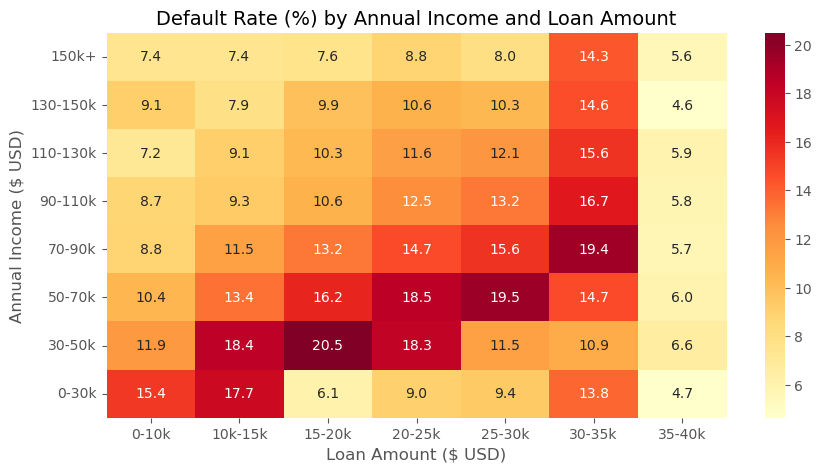

In [69]:
# Bin loan amounts
loan_bins = [0, 10000, 15000, 20000, 25000, 30000, 35000,accepted_sample['amount_requested'].max()]
loan_labels = ['0-10k', '10k-15k','15-20k', '20-25k', '25-30k', '30-35k', '35-40k'] 
accepted_sample['loan_bin'] = pd.cut(accepted_sample['amount_requested'], bins=loan_bins, labels=loan_labels, include_lowest=True)

# Group by income_bin and loan_bin to calculate default rate
default_heatmap = accepted_sample.groupby(['income_bin', 'loan_bin'], observed=False)['default_flag'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(10,5))
sns.heatmap(default_heatmap * 100, annot=True, fmt=".1f", cmap='YlOrRd')
plt.gca().invert_yaxis()
plt.title('Default Rate (%) by Annual Income and Loan Amount', fontsize=14)
plt.xlabel('Loan Amount ($ USD)', fontsize=12)
plt.ylabel('Annual Income ($ USD)', fontsize=12)
plt.show()

##### Interpretation: Default Rate by Loan Amount and Income

- **Trend across income bins:** As annual income increases, the default rate generally **decreases** for smaller loan amounts (0–15k), indicating that higher-income borrowers are less likely to default on smaller loans.  
- **High default spikes:** Certain income bins (30–50k and 50–70k) show **higher default rates for mid-range loans** (10k–25k), suggesting borrowers in these income ranges may take riskier loans relative to their income.  
- **Large loans:** For higher loan amounts (30k+), default rates rise slightly across most income groups, highlighting increased risk with larger loan commitments, even for higher-income borrowers.  
- **Variation within bins:** Some fluctuations (e.g., 0-30k income group with 10k–15k loan showing 17.7% default) indicate that default risk is not purely linear and should be considered along with other borrower characteristics.


>**insight:** Default risk is influenced by both **loan size and borrower income**, and mid-sized loans for middle-income groups appear particularly vulnerable. This insight can guide **risk-based pricing or approval decisions**.